<a href="https://colab.research.google.com/github/jayanth142006/paddy-disease-classification/blob/main/soil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/My Drive/soil/Train"
test_dir = "/content/drive/My Drive/soil/test"

In [ ]:
IMG_SIZE = (224, 224)  # Image size for ResNet50
BATCH_SIZE = 32
EPOCHS = 25
LEARNING_RATE = 1e-4

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load Data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 1220 images belonging to 4 classes.
Found 340 images belonging to 4 classes.


In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

# Create the Model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the Model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 471s 9s/step - accuracy: 0.3717 - loss: 1.3590 - val_accuracy: 0.1559 - val_loss: 1.4526
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


39/39 ━━━━━━━━━━━━━━━━━━━━ 67s 563ms/step - accuracy: 0.4414 - loss: 1.3147 - val_accuracy: 0.1559 - val_loss: 1.4996
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 27s 566ms/step - accuracy: 0.4306 - loss: 1.3069 - val_accuracy: 0.1559 - val_loss: 1.5087
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 28s 571ms/step - accuracy: 0.4253 - loss: 1.3194 - val_accuracy: 0.1559 - val_loss: 1.5011
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 27s 565ms/step - accuracy: 0.4368 - loss: 1.3077 - val_accuracy: 0.1559 - val_loss: 1.4993
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [ ]:
# Unfreeze some layers in the base model for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:140]:  # Freeze the first 140 layers
    layer.trainable = False

# Re-compile the Model for Fine-Tuning
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE / 10),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




In [ ]:
# Fine-Tune the Model
fine_tune_history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.2067 - loss: 1.5326 - val_accuracy: 0.1559 - val_loss: 1.4774
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 87s 606ms/step - accuracy: 0.2762 - loss: 1.4349 - val_accuracy: 0.1559 - val_loss: 1.5065
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 42s 617ms/step - accuracy: 0.3549 - loss: 1.3800 - val_accuracy: 0.1559 - val_loss: 1.5471
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10


KeyboardInterrupt: 

In [ ]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_data, steps=len(test_data))
print(f"Test Accuracy: {test_acc * 100:.2f}%")


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.8072 - loss: 0.4816
Test Accuracy: 81.76%


In [ ]:
from tensorflow.keras.models import save_model
model.save("/content/drive/My Drive/soil/soil_class_model.h5")
  # Save the model in HDF5 format


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class: Clay soil


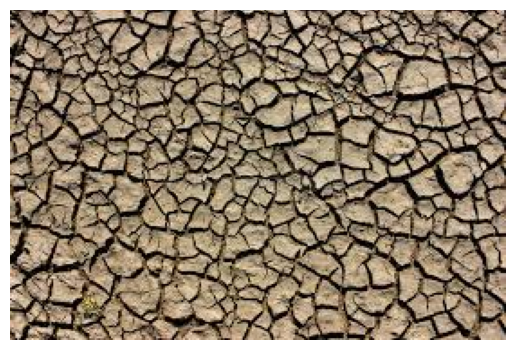

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, img_size=(224, 224)):
    # Load the image
    img = image.load_img(img_path, target_size=img_size)
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Rescale the image (divide pixel values by 255)
    img_array = img_array / 255.0
    # Expand the dimensions (since the model expects a batch of images)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array
# Path to the image you want to test
img_path = "/content/drive/My Drive/soil/test/Clay soil/Clay_1.jpg"  # Replace with your image path

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make the prediction using the trained model
predictions = model.predict(img_array)

# Get the predicted class (index of the highest probability)
predicted_class = np.argmax(predictions, axis=1)

# Get the class label (assuming you have a class_labels list)
class_labels = train_data.class_indices  # This should be from the training data generator
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Get the predicted class label
predicted_class_label = class_labels[predicted_class[0]]

# Output the prediction
print(f"Predicted Class: {predicted_class_label}")

# Optionally, display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
